In [1]:
import pandas as pd
import numpy as np
import pickle
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
###GET DATA###
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print("shapeof data:",data.shape)

shapeof data: (2670, 4)


In [3]:
data = data.replace('',np.nan)
data = data.dropna()
print("shape after dropping",data.shape)

shape after dropping (2522, 4)


In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
###PREPROCESSING####

def preprocess(dats):
    
    entries = data.copy()
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    for index,entry in entries.iterrows():
        #print(entry['description'])
        soup = BeautifulSoup(entry['description'])
        text = soup.get_text()
        #print(text.lower())
        text.lower()
        text = re.sub(r'^\w+[\s,\t]*:[\s,\t]*https?:\/\/.*.\w*', '', text, flags=re.MULTILINE)
        entry['description']= [word_tokenize(entry['description'])]
        
        #print(entry['description'])
        temp_list = entry['description']
        
        for index,henry in enumerate(temp_list):
            #print(index,henry)
            index = int(index)
            Final_words = []
            word_Lemmatized = WordNetLemmatizer()
            for word, tag in pos_tag(henry):
                if word not in stopwords.words('english') and word.isalpha():
                    word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                    Final_words.append(word_Final)
                temp_list[index] = str(Final_words[1:-1])        
        entry['description'] = temp_list
    return entries

data_pre = preprocess(data)


c:\users\udit\assesmentprecily\assesment\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [6]:
for i in range(len(data_pre.description)):
    data_pre.description.iloc[i] = data_pre.description.iloc[i][0]
    print(data_pre.description.iloc[i])
    data_pre.description.iloc[i] = data_pre.description.iloc[i][1:-1].replace(",","")
    print(data_pre.description.iloc[i])
    data_pre.description.iloc[i] = data_pre.description.iloc[i].replace("'","")
    print(data_pre.description.iloc[i])

['head', 'vacation', 'adventure', 'Here', 'travel', 'blogger', 'budget', 'time', 'money', 'plan', 'next']
'head' 'vacation' 'adventure' 'Here' 'travel' 'blogger' 'budget' 'time' 'money' 'plan' 'next'
head vacation adventure Here travel blogger budget time money plan next
['Denver', 'woman', 'make', 'plea', 'help', 'Instagram', 'account', 'ten', 'thousand', 'follower', 'hack', 'hold']
'Denver' 'woman' 'make' 'plea' 'help' 'Instagram' 'account' 'ten' 'thousand' 'follower' 'hack' 'hold'
Denver woman make plea help Instagram account ten thousand follower hack hold
['n', 'Fomo', 'Meet', 'Kritika', 'Khurana']
'n' 'Fomo' 'Meet' 'Kritika' 'Khurana'
n Fomo Meet Kritika Khurana
['blogger', 'Ben', 'Schlapping', 'crowdfunding', 'buy', 'ticket', 'Etihad', 'Airways', 'Residence', 'cabin', 'review', 'experience', 'Mara', 'Montalbano', 'maramontalbano']
'blogger' 'Ben' 'Schlapping' 'crowdfunding' 'buy' 'ticket' 'Etihad' 'Airways' 'Residence' 'cabin' 'review' 'experience' 'Mara' 'Montalbano' 'maramonta

Your Travel Blog Will Fail way prevent It feel like everyone day interested travel blogger Around New Year people get excited set goal They think clever blog name buy domain set wordpress jazz After month excitement start fizzle enthusiastic anymore You see traffic site engagement start wonder make big mistake You may start write less less give together Let ask If open restaurant brick mortar shop think become profitable couple month You would money save pay rent take spend money make money right In video I talk reason travel blog fail lack travel Sidewalker Daily commit bridge gap travel brand content creator provide unparalleled support educational resource best industry practice As expert side equation dedicate brand creator equally always strive facilitate partnership involve Over year help brand manage influencer marketing strategy help influencers We highly encourage look successful Free Resource Library Press Trip Program Blog Photoguides Private Facebook Group please note group

['Roman', 'Saini', 'Unacademy', 'http', 'For', 'Special', 'Classes', 'click', 'http', 'In', 'course', 'Roman', 'discuss', 'comprehensive', 'strategy', 'prepare', 'UPSC', 'CSE', 'All', 'doubt', 'query', 'relate', 'preparation', 'prelim', 'address', 'resolve', 'He', 'also', 'try', 'analyze', 'predict', 'pattern', 'UPSC', 'CSE', 'prelim', 'The', 'course', 'conduct', 'English', 'note', 'also', 'provide', 'English', 'Science', 'Technology', 'important', 'part', 'UPSC', 'Prelims', 'syllabus', 'It', 'cover', 'static', 'portion', 'dynamic', 'well', 'civil', 'service', 'exam', 'In', 'recent', 'year', 'UPSC', 'emphasize', 'dynamic', 'well', 'analytical', 'aspect', 'Science', 'Technology', 'S', 'T', 'This', 'session', 'must', 'watch', 'IAS', 'aspirant', 'want', 'prepare', 'section', 'science', 'technology', 'UPSC', 'You', 'go', 'Plus', 'tab', 'Unacademy', 'app', 'website', 'noon', 'every', 'day', 'register', 'special', 'class', 'conduct', 'Top', 'Educators', 'Unacademy', 'Download', 'Unacademy', 

'Video' 'University' 'Science' 'Technology' 'Chine' 'Hefei' 'City' 'Anhui'
Video University Science Technology Chine Hefei City Anhui
['Trump', 'regime', 'time', 'science', 'It', 'loser', 'baby', 'Cenk', 'Uygur', 'John', 'Iadarola', 'host', 'The', 'Young', 'Turks', 'discus', 'Tell', 'u', 'think', 'comment', 'section', 'http', 'The', 'branch', 'US', 'Environmental', 'Protection', 'Agency', 'charge', 'create', 'clean', 'water', 'standard', 'longer', 'word', 'science', 'mission', 'statement', 'Earlier', 'year', 'stated', 'mission', 'Office', 'Science', 'Technology', 'EPA', 'Water', 'Office', 'develop', 'sound', 'standard', 'scientific', 'technological', 'foundation', 'achieve', 'clean', 'water', 'accord', 'copy', 'EPA', 'website', 'archive', 'January', 'Internet', 'Archive', 'Wayback', 'Machine', 'The', 'text', 'mission', 'statement', 'change', 'office', 'mandate', 'create', 'economically', 'technologically', 'achievable', 'performance', 'The', 'word', 'scientific', 'longer', 'A', 'coalit

'Technology' 'Australia' 'STA' 'Australia' 'peak' 'body' 'science' 'technology' 'represent' 'Australian' 'scientist' 'technologist' 'work' 'across' 'scientific' 'discipline' 'STA' 'respected' 'influential' 'contributor' 'debate' 'public' 'policy' 'provide' 'strong' 'voice' 'represent' 'Our' 'mission' 'bring' 'together' 'scientist' 'government' 'industry' 'broad' 'community' 'advance' 'role' 'reputation' 'impact' 'science' 'technology' 'across' 'nation' 'Find'
Technology Australia STA Australia peak body science technology represent Australian scientist technologist work across scientific discipline STA respected influential contributor debate public policy provide strong voice represent Our mission bring together scientist government industry broad community advance role reputation impact science technology across nation Find
['LIKE', 'OUR', 'VIDEOS', 'SHARE', 'OUR', 'VIDEOS', 'SUBSCRIBE', 'TO', 'OUR', 'CHANNEL', 'Social', 'Media', 'Facebook']
'LIKE' 'OUR' 'VIDEOS' 'SHARE' 'OUR' 'VIDEO

'Technology' 'Minister' 'Mmamoloko' 'say' 'full' 'support' 'president' 'deputy' 'president' 'regard' 'champion' 'department' 'portfolio' 'The' 'leadership' 'understand' 'need' 'do' 'Even' 'deputy' 'president' 'David' 'Mabuza' 'accompany' 'centre' 'Hermanus' 'Western' 'Cape' 'South' 'African' 'National' 'Space' 'Agency' 'locate' 'We' 'one' 'two' 'space' 'agency' 'centre' 'award' 'aviation' 'space' 'work' 'second' 'share' 'China' 'Russia' 'say' 'The' 'minister' 'add' 'guarantee' 'portfolio' 'safe' 'term' 'project' 'work' 'start' 'I' 'think' 'able' 'expand' 'Science' 'Technology' 'Innovation' 'able' 'assist' 'u' 'create' 'new'
Technology Minister Mmamoloko say full support president deputy president regard champion department portfolio The leadership understand need do Even deputy president David Mabuza accompany centre Hermanus Western Cape South African National Space Agency locate We one two space agency centre award aviation space work second share China Russia say The minister add gu

['Learn', 'make', 'old', 'cinema', 'projector', 'device', 'display', 'motion', 'picture', 'film', 'project', 'onto', 'screen', 'require', 'one', 'torch', 'one', 'magnifying', 'glass', 'Let', 'check', 'website', 'major', 'detail', 'Visit', 'New', 'NK', 'Facebook', 'About', 'Glue', 'Its', 'Physics', 'work', 'model', 'science', 'exhibition', 'Thank', 'watch', 'crazy']
'Learn' 'make' 'old' 'cinema' 'projector' 'device' 'display' 'motion' 'picture' 'film' 'project' 'onto' 'screen' 'require' 'one' 'torch' 'one' 'magnifying' 'glass' 'Let' 'check' 'website' 'major' 'detail' 'Visit' 'New' 'NK' 'Facebook' 'About' 'Glue' 'Its' 'Physics' 'work' 'model' 'science' 'exhibition' 'Thank' 'watch' 'crazy'
Learn make old cinema projector device display motion picture film project onto screen require one torch one magnifying glass Let check website major detail Visit New NK Facebook About Glue Its Physics work model science exhibition Thank watch crazy
['country', 'try', 'make', 'army', 'superior', 'make',

['I', 'taste', 'food', 'foreign', 'motherland', 'I', 'upload', 'toilet', 'right', 'Make', 'sure', 'subscribe', 'Zane', 'http', 'zanehijazi', 'Music', 'Creds', 'Indian', 'instrumental', 'music', 'remix', 'Dj', 'Vladof', 'Keep', 'little', 'brown', 'girl', 'INSTAGRAM', 'TWITTER', 'SNAPCHAT', 'lizakoshysnaps', 'lizzza', 'WATCH', 'MY', 'OTHER', 'VIDS', 'TARGET', 'WITH', 'LIZZZA', 'PART', 'WORLD', 'BEST', 'BEAUTY', 'HACKS', 'MEET', 'JET', 'PLEASE', 'SUBSCRIBE', 'Thank', 'lil', 'sick', 'nasties', 'Love']
'I' 'taste' 'food' 'foreign' 'motherland' 'I' 'upload' 'toilet' 'right' 'Make' 'sure' 'subscribe' 'Zane' 'http' 'zanehijazi' 'Music' 'Creds' 'Indian' 'instrumental' 'music' 'remix' 'Dj' 'Vladof' 'Keep' 'little' 'brown' 'girl' 'INSTAGRAM' 'TWITTER' 'SNAPCHAT' 'lizakoshysnaps' 'lizzza' 'WATCH' 'MY' 'OTHER' 'VIDS' 'TARGET' 'WITH' 'LIZZZA' 'PART' 'WORLD' 'BEST' 'BEAUTY' 'HACKS' 'MEET' 'JET' 'PLEASE' 'SUBSCRIBE' 'Thank' 'lil' 'sick' 'nasties' 'Love'
I taste food foreign motherland I upload toilet 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
X = data_pre.description
y = data_pre.category
X_train, X_test,y_train,y_test = train_test_split(X,y)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1891,) (631,)
(1891,) (631,)


vector = CountVectorizer()
tfdf = TfidfTransformer()

X_train_counts = vector.fit_transform(X_train)
print(X_train_counts.shape)
X_train_tfidf = tfdf.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
clf = naive_bayes.MultinomialNB().fit(X_train_tfidf, y_train)

X_test_count = vector.transform(X_test)
print(X_test_count.shape)
X_test_tfidf = tfdf.fit_transform(X_test_count)
print(X_test_tfidf.shape)
pred = clf.predict(X_test_tfidf)
np.mean(pred == y_test)

In [8]:
pipe_clf_svm = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('clf',LinearSVC(dual=False))])
parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
    'clf__penalty' : ('l1','l2'),
    'clf__loss': ('squared_hinge','hinge')
}

gc_clf_svm = GridSearchCV(pipe_clf_svm, parameters,n_jobs=1,error_score=0.0)
gc_clf_svm = gc_clf_svm.fit(X_train,y_train)
print(gc_clf_svm.best_score_)
print(gc_clf_svm.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The comb

0.8773135906927552
{'clf__loss': 'squared_hinge', 'clf__penalty': 'l2', 'tfdf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [9]:
pred_svm = gc_clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test,pred_svm)
precision_svm = precision_score(y_test,pred_svm,average='weighted')
f1_score_svm = f1_score(y_test, pred_svm,average='weighted')
recall_scaore_svm = recall_score(y_test,pred_svm, average='weighted')
print("#####FOR SVM#####")
print("Accuracy: ",accuracy_svm)
print("Precision:",precision_svm)
print("F1 Score:", f1_score_svm)
print("Recall Score:", recall_scaore_svm)

#####FOR SVM#####
Accuracy:  0.8779714738510301
Precision: 0.879900329402873
F1 Score: 0.878349227641101
Recall Score: 0.8779714738510301


In [10]:
pipe_clf = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('clf-multinb',naive_bayes.MultinomialNB())])
parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
    'clf-multinb__alpha': (1e-2,2e-3),
}

gc_clf_nb = GridSearchCV(pipe_clf,parameters, n_jobs=1)
gc_clf_nb = gc_clf_nb.fit(X_train,y_train)
print(gc_clf_nb.best_score_)
print(gc_clf_nb.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.822316234796404
{'clf-multinb__alpha': 0.01, 'tfdf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [13]:
pred_nb = gc_clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test,pred_nb)
precision_nb = precision_score(y_test,pred_nb,average='weighted')
f1_score_nb = f1_score(y_test, pred_nb,average='weighted')
recall_scaore_nb = recall_score(y_test,pred_nb, average='weighted')
print("####FOR NB######")
print("Accuracy: ",accuracy_nb)
print("Precision:",precision_nb)
print("F1 Score:", f1_score_nb)
print("Recall Score:", recall_scaore_nb)

####FOR NB######
Accuracy:  0.820919175911252
Precision: 0.8315259612266503
F1 Score: 0.8164496628064047
Recall Score: 0.820919175911252


In [14]:
pipe_bag = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('boost', BaggingClassifier(base_estimator=naive_bayes.MultinomialNB()))])

parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
}
gc_clf_bc = GridSearchCV(pipe_bag,parameters, n_jobs=1)
gc_clf_bc = gc_clf_bc.fit(X_train,y_train)
print(gc_clf_bc.best_score_)
print(gc_clf_bc.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7080909571655208
{'tfdf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [15]:
pred_bc = gc_clf_bc.predict(X_test)
accuracy_bc = accuracy_score(y_test,pred_bc)
precision_bc = precision_score(y_test,pred_bc,average='weighted')
f1_score_bc = f1_score(y_test, pred_bc,average='weighted')
recall_scaore_bc = recall_score(y_test,pred_bc, average='weighted')
print("#####FOR Bagging with NB")
print("Accuracy: ",accuracy_bc)
print("Precision:",precision_bc)
print("F1 Score:", f1_score_bc)
print("Recall Score:", recall_scaore_bc)

#####FOR Bagging with NB
Accuracy:  0.7083993660855784
Precision: 0.7745793038329405
F1 Score: 0.6917194272897172
Recall Score: 0.7083993660855784


c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
pipe_boost = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('boost', AdaBoostClassifier(base_estimator=naive_bayes.MultinomialNB()))])

parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
}

gc_clf_boost = GridSearchCV(pipe_boost,parameters, n_jobs=1)
gc_clf_boost = gc_clf_boost.fit(X_train,y_train)
print(gc_clf_boost.best_score_)
print(gc_clf_boost.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.514013749338974
{'tfdf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [17]:
pred_boost = gc_clf_boost.predict(X_test)
accuracy_boost = accuracy_score(y_test,pred_boost)
precision_boost = precision_score(y_test,pred_boost,average='weighted')
f1_score_boost = f1_score(y_test, pred_boost,average='weighted')
recall_scaore_boost = recall_score(y_test,pred_boost, average='weighted')
print("#####FOR BOOSTING WITH NB######")
print("Accuracy: ",accuracy_boost)
print("Precision:",precision_boost)
print("F1 Score:", f1_score_boost)
print("Recall Score:", recall_scaore_boost)

#####FOR BOOSTING WITH NB######
Accuracy:  0.5055467511885895
Precision: 0.7194919472992783
F1 Score: 0.4225297582296757
Recall Score: 0.5055467511885895


c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
pipe_bag_svm = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('boost', BaggingClassifier(base_estimator=LinearSVC(dual=False,penalty="l2",loss="squared_hinge")))])

parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
}

gc_clf_bag_svm = GridSearchCV(pipe_bag_svm, parameters,n_jobs=1,error_score=0.0)
gc_clf_bag_svm = gc_clf_bag_svm.fit(X_train,y_train)
print(gc_clf_bag_svm.best_score_)
print(gc_clf_bag_svm.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8773135906927552
{'tfdf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [19]:
pred_bag_svm = gc_clf_bag_svm.predict(X_test)
accuracy_bag_svm = accuracy_score(y_test,pred_bag_svm)
precision_bag_svm = precision_score(y_test,pred_bag_svm,average='weighted')
f1_score_bag_svm = f1_score(y_test, pred_bag_svm,average='weighted')
recall_scaore_bag_svm = recall_score(y_test,pred_bag_svm, average='weighted')
print("#####FOR BAGGING WITH SVC#######")
print("Accuracy: ",accuracy_bag_svm)
print("Precision:",precision_bag_svm)
print("F1 Score:", f1_score_bag_svm)
print("Recall Score:", recall_scaore_bag_svm)

#####FOR BAGGING WITH SVC#######
Accuracy:  0.8779714738510301
Precision: 0.879900329402873
F1 Score: 0.878349227641101
Recall Score: 0.8779714738510301


In [20]:
pipe_boost_svm = Pipeline([('vect',CountVectorizer()),('tfdf',TfidfTransformer()),('boost', AdaBoostClassifier(base_estimator=LinearSVC(dual=False,penalty="l2",loss="squared_hinge"),algorithm="SAMME"))])

parameters= {
    'vect__ngram_range':[(1,1),(1,2)],
    'tfdf__use_idf': (True,False),
}

gc_clf_boost_svm = GridSearchCV(pipe_boost_svm, parameters,n_jobs=1,error_score=0.0)
gc_clf_boost_svm = gc_clf_boost_svm.fit(X_train,y_train)
print(gc_clf_boost_svm.best_score_)
print(gc_clf_boost_svm.best_params_)

c:\users\udit\assesmentprecily\assesment\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8773135906927552
{'tfdf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [21]:
pred_boost_svm = gc_clf_boost_svm.predict(X_test)
accuracy_boost_svm = accuracy_score(y_test,pred_boost_svm)
precision_boost_svm = precision_score(y_test,pred_boost_svm,average='weighted')
f1_score_boost_svm = f1_score(y_test, pred_boost_svm,average='weighted')
recall_scaore_boost_svm = recall_score(y_test,pred_boost_svm, average='weighted')
print("#######FOR BOOSTING WITH SVC######")
print("Accuracy: ",accuracy_boost_svm)
print("Precision:",precision_boost_svm)
print("F1 Score:", f1_score_boost_svm)
print("Recall Score:", recall_scaore_boost_svm)

#######FOR BOOSTING WITH SVC######
Accuracy:  0.8779714738510301
Precision: 0.879900329402873
F1 Score: 0.878349227641101
Recall Score: 0.8779714738510301


[ 1 11 21 31 41 51]


<Figure size 2160x2160 with 0 Axes>

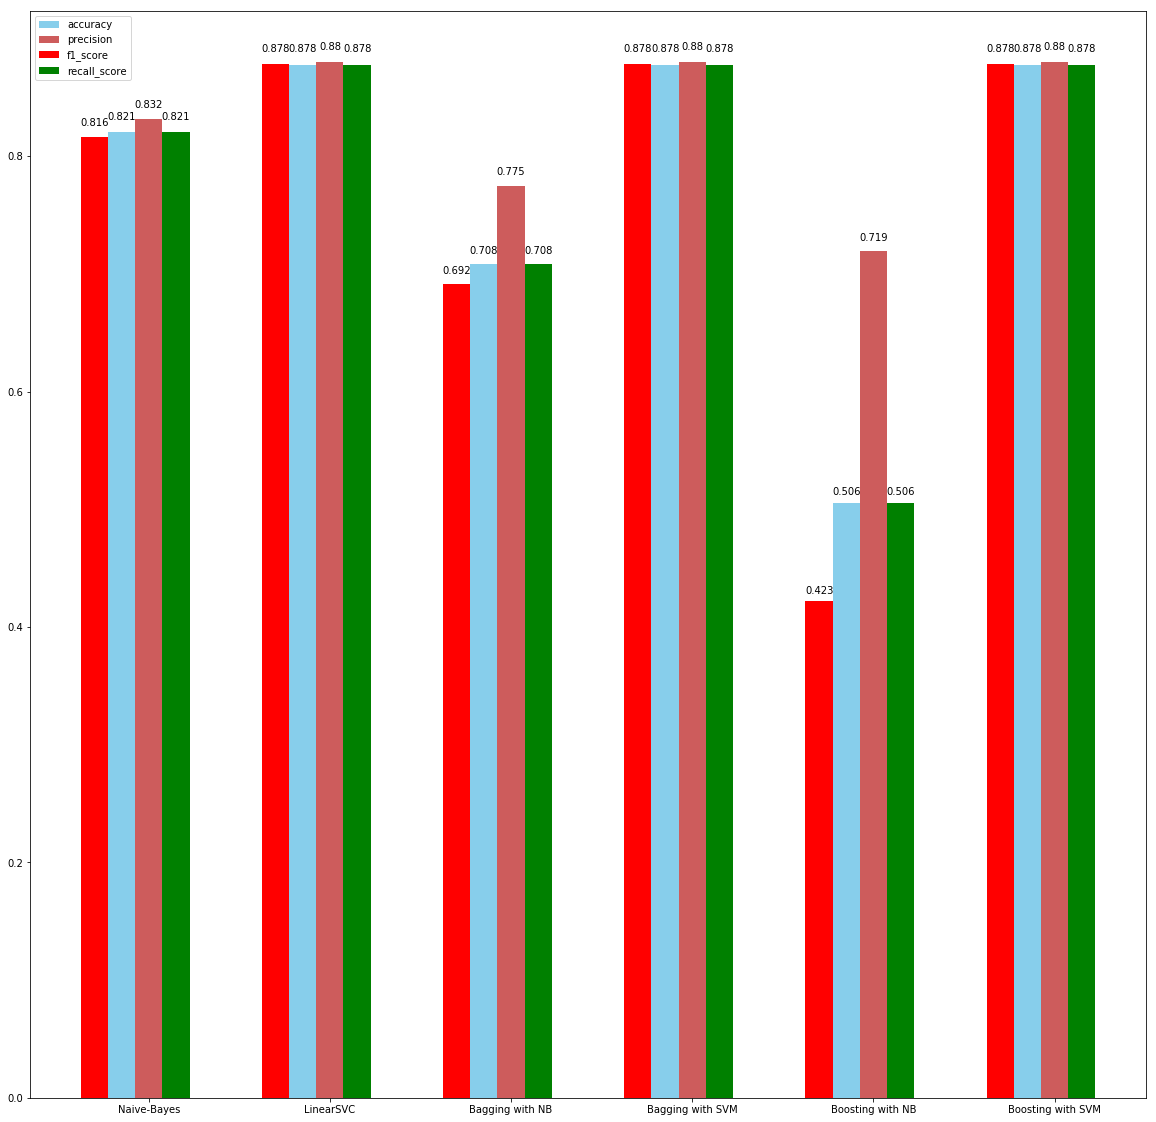

In [23]:
plt.figure(figsize=(30,30))
names = ["Naive-Bayes","LinearSVC","Bagging with NB", "Bagging with SVM","Boosting with NB","Boosting with SVM"]
ind = np.arange(1,60,10)
print(ind)
width = 1.5
fig, ax = plt.subplots(figsize=(20,20))
#fig.fisize = (20,20)
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{0:.3g}'.format(height), ha=ha[xpos], va='bottom')

rect1 = ax.bar(ind - width, (accuracy_nb,accuracy_svm,accuracy_bc,accuracy_bag_svm,accuracy_boost,accuracy_boost_svm), width, color='SkyBlue',label="accuracy" )
rect2 = ax.bar(ind, (precision_nb,precision_svm,precision_bc,precision_bag_svm,precision_boost,precision_boost_svm), width, color="IndianRed", label="precision")
rect3 = ax.bar(ind - width*2, (f1_score_nb,f1_score_svm,f1_score_bc,f1_score_bag_svm,f1_score_boost,f1_score_boost_svm),width,color="red",label="f1_score")
rect4 = ax.bar(ind + width, (recall_scaore_nb,recall_scaore_svm,recall_scaore_bc,recall_scaore_bag_svm,recall_scaore_boost,recall_scaore_boost_svm),width,color="green",label="recall_score")
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.set_xticks(ind)
ax.set_xticklabels((names))
ax.legend()